## Data Preprocessing & Cleaning ##

Steps:

1. Import important libraraies.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the **Heart Disease UCI dataset** into a Pandas DataFrame.

In [12]:
df = pd.read_csv("../data/heart_disease.csv")

3. Handle **missing values** (imputation or removal).

In [13]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['cp','restecg','slope','ca','thal'])
cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0]).astype(int)

4. Perform **data encoding** (one-hot encoding for categorical variables).

In [14]:
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

5. Conduct **Exploratory Data Analysis (EDA)** with **histograms, correlation heatmaps, and boxplots**.



- Histograms for age, chol, and thalach.

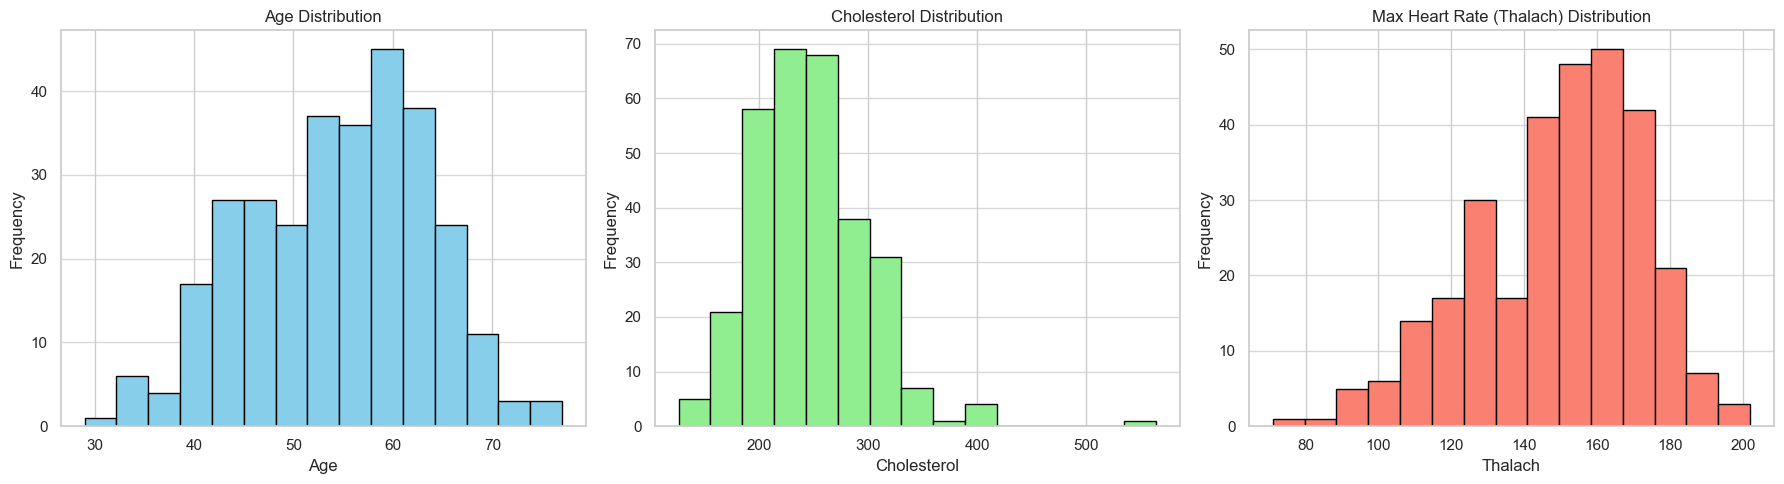

In [15]:
plt.figure(figsize=(18,5))

# Histogram for Age
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for Cholesterol
plt.subplot(1, 3, 2)
plt.hist(df['chol'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for Max Heart Rate (thalach)
plt.subplot(1, 3, 3)
plt.hist(df['thalach'], bins=15, color='salmon', edgecolor='black')
plt.title('Max Heart Rate (Thalach) Distribution')
plt.xlabel('Thalach')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

- Correlation Heatmaps

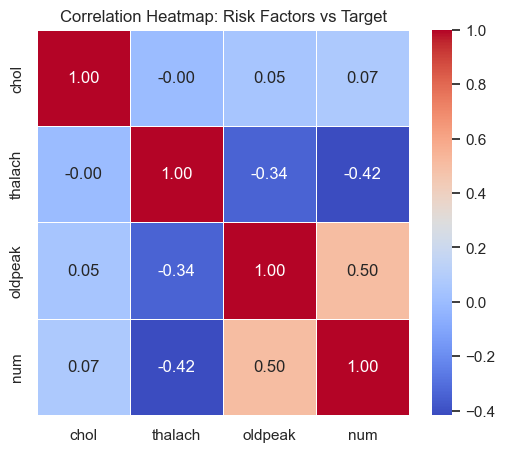

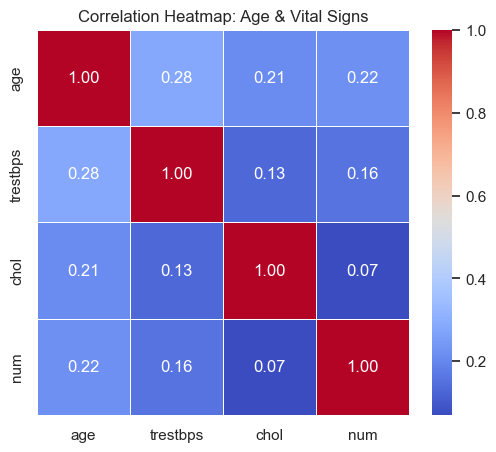

In [16]:
features1 = ['chol', 'thalach', 'oldpeak', 'num']
plt.figure(figsize=(6,5))
sns.heatmap(df[features1].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Risk Factors vs Target")
plt.show()

features2 = ['age', 'trestbps', 'chol', 'num']
plt.figure(figsize=(6,5))
sns.heatmap(df[features2].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Age & Vital Signs")
plt.show()

- Boxplots

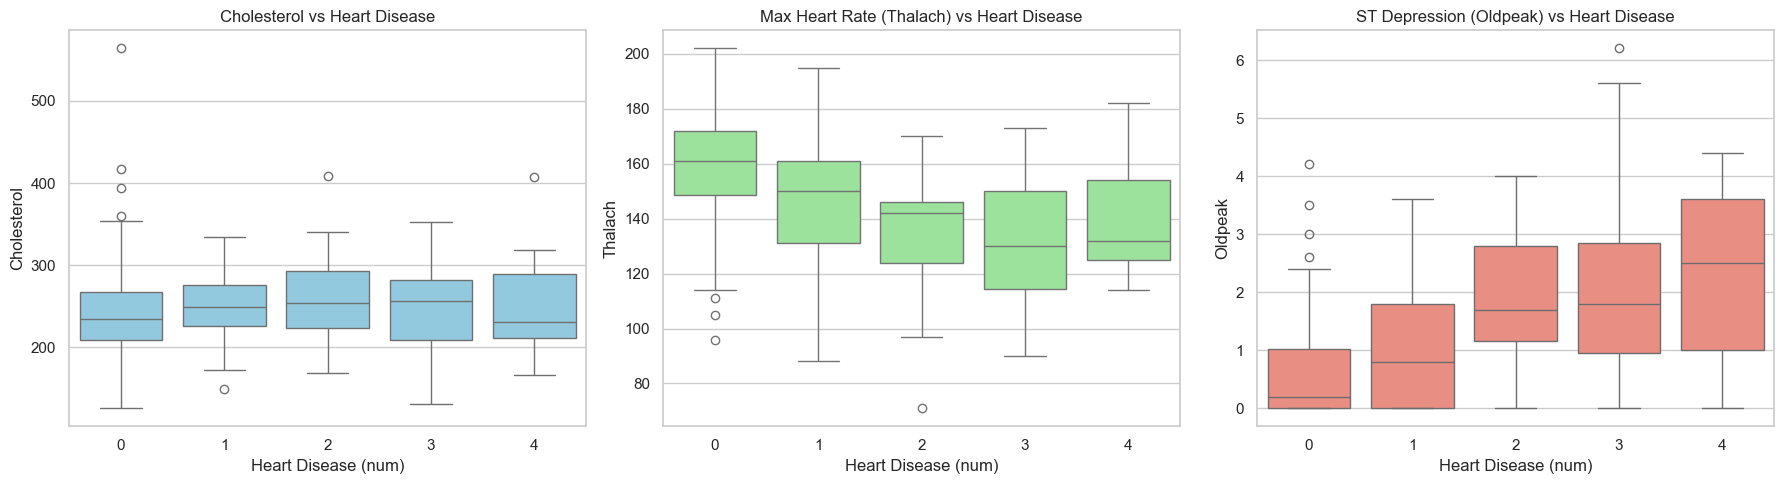

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.boxplot(x='num', y='chol', data=df, color="skyblue")
plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Heart Disease (num)')
plt.ylabel('Cholesterol')

plt.subplot(1, 3, 2)
sns.boxplot(x='num', y='thalach', data=df, color="lightgreen")
plt.title('Max Heart Rate (Thalach) vs Heart Disease')
plt.xlabel('Heart Disease (num)')
plt.ylabel('Thalach')

plt.subplot(1, 3, 3)
sns.boxplot(x='num', y='oldpeak', data=df, color="salmon")
plt.title('ST Depression (Oldpeak) vs Heart Disease')
plt.xlabel('Heart Disease (num)')
plt.ylabel('Oldpeak')

plt.tight_layout()
plt.show()

6. Standardize numerical features using **MinMaxScaler** or **StandardScaler**.

In [18]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

7. Convert target to binary

In [19]:
df["num"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

7. Save the changes

In [20]:
df.to_csv("../data/heart_disease.csv", index=False)